In [36]:
import sys
import os

# Add the parent directory of the current folder to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
import talib as talib
import matplotlib.pyplot as plt
from script.loader import load_data

In [37]:
AAPL=load_data('data/AAPL_historical_data.csv')
AMZN=load_data('data/AMZN_historical_data.csv')
GOOGL=load_data('data/GOOG_historical_data.csv')
MSFT=load_data('data/MSFT_historical_data.csv')
TSLA=load_data('data/TSLA_historical_data.csv')
META=load_data('data/META_historical_data.csv')
NVDA=load_data('data/NVDA_historical_data.csv')

In [38]:
print("Apple historical data\n", AAPL.head())
print("Amazon historical data\n", AMZN.head())
print("Google historical data\n", GOOGL.head())
print("Microsoft historical data\n", MSFT.head())
print("Tesla historical data\n", TSLA.head())
print("Meta historical data\n", META.head())
print("Nvidia historical data\n", NVDA.head())

Apple historical data
          Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
Amazon historical data
          Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417

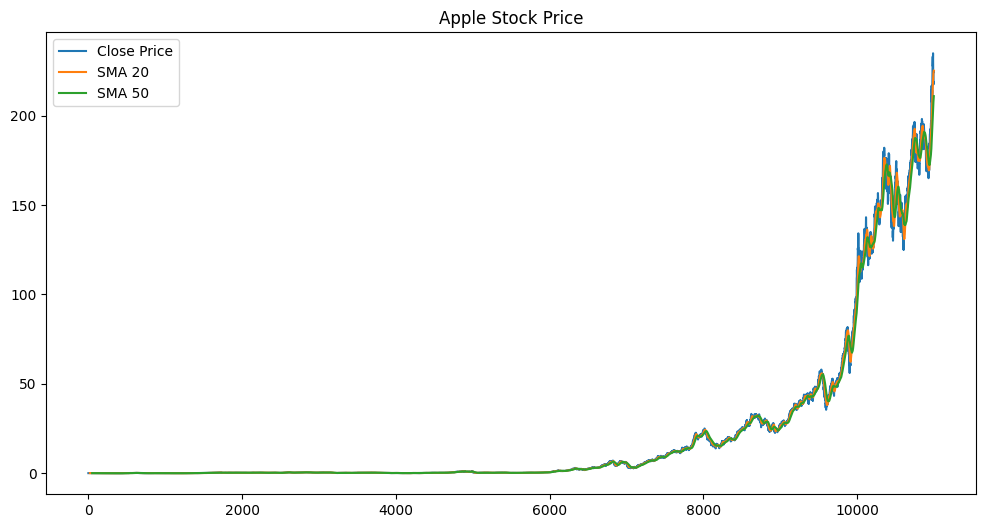

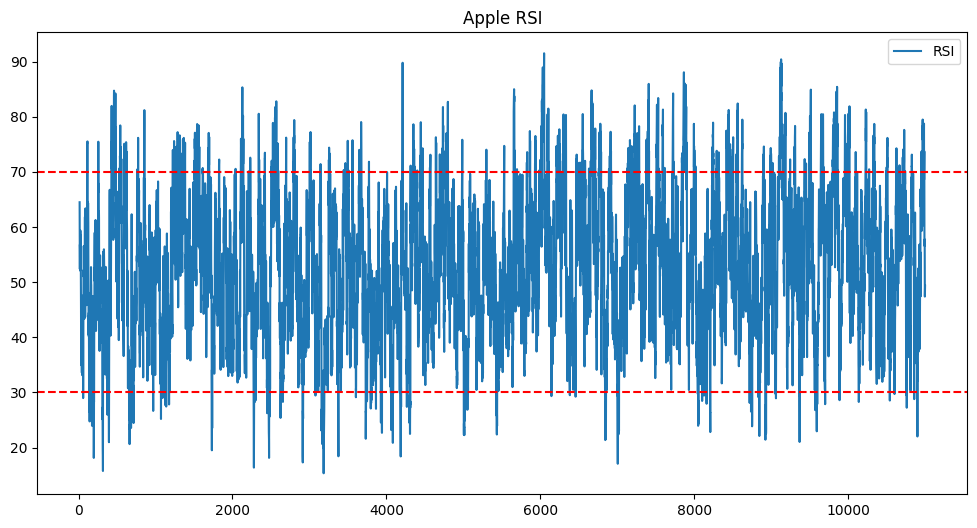

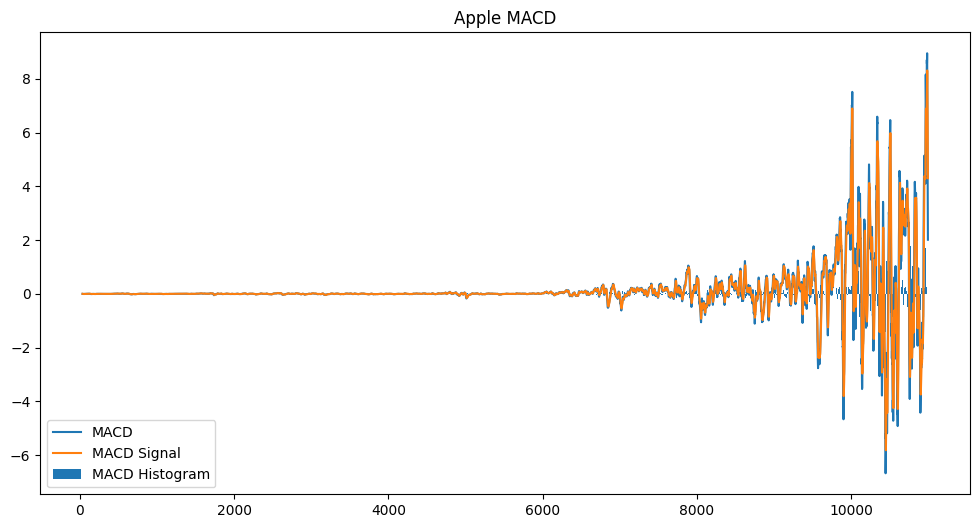

In [ ]:
# Moving averages
AAPL['SMA_20'] = talib.SMA(AAPL['Close'], timeperiod=20)
AAPL['SMA_50'] = talib.SMA(AAPL['Close'], timeperiod=50)

# RSI
AAPL['RSI'] = talib.RSI(AAPL['Close'], timeperiod=14)

AAPL['MACD'], AAPL['MACD_SIGNAL'], AAPL['MACD_HIST'] = talib.MACD(AAPL['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


plt.figure(figsize=(12, 6))
plt.plot(AAPL['Close'], label='Close Price')
plt.plot(AAPL['SMA_20'], label='SMA 20')
plt.plot(AAPL['SMA_50'], label='SMA 50')
plt.title('Apple Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(AAPL['RSI'], label='RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='r', linestyle='--')
plt.title('Apple RSI')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(AAPL['MACD'], label='MACD')
plt.plot(AAPL['MACD_SIGNAL'], label='MACD Signal')
plt.bar(AAPL.index, AAPL['MACD_HIST'], label='MACD Histogram')
plt.title('Apple MACD')
plt.legend()
plt.show()



In [33]:
#Use PyNance for Financial Metrics
import pynance as pn


In [35]:
stock = pn.stock.get('AAPL')
print(stock.head())

AttributeError: module 'pynance' has no attribute 'stock'